# Clustering Small Set of News Sources

Junita Sirait

For case study purposes

In [1]:
import json
import csv
import pandas as pd
import numpy as np
import statistics

import tldextract

from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from kneed import KneeLocator

from scipy.interpolate import make_interp_spline, BSpline

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import math

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold

import os

In [2]:
sports_subreddits = [
    "Patriots",
    "GreenBayPackers",
    "Seahawks",
    "eagles",
    "cowboys",
    "minnesotavikings",
    "DenverBroncos",
    "steelers",
    "49ers",
    "detroitlions",
    "falcons",
    "panthers",
    "CHIBears",
    "NYGiants",
    "Browns",
    "Texans",
    "Chargers",
    "oaklandraiders",
    "bengals",
    "buffalobills",
    "ravens",
    "Colts",
    "nyjets",
    "Redskins",
    "miamidolphins",
    "KansasCityChiefs",
    "Tennesseetitans",
    "AZCardinals",
    "Saints",
    "LosAngelesRams",
    "Jaguars",
    "buccaneers",
    "StLouisRams",
    "warriors",
    "clevelandcavs",
    "lakers",
    "chicagobulls",
    "torontoraptors",
    "bostonceltics",
    "NYKnicks",
    "sixers",
    "rockets",
    "Thunder",
    "NBASpurs",
    "heat",
    "timberwolves",
    "AtlantaHawks",
    "Mavericks",
    "kings",
    "MkeBucks",
    "LAClippers",
    "suns",
    "CharlotteHornets",
    "washingtonwizards",
    "DetroitPistons",
    "pacers",
    "OrlandoMagic",
    "GoNets",
    "NOLAPelicans",
    "denvernuggets",
    "UtahJazz",
    "memphisgrizzlies",
    "reddevils",
    "Gunners",
    "LiverpoolFC",
    "chelseafc",
    "coys",
    "MCFC",
    "Everton",
    "Hammers",
    "SaintsFC",
    "lcfc",
    "swanseacity",
    "crystalpalace",
    "safc",
    "watford_FC",
    "WBAfootball",
    "AFCBournemouth",
    "HullCity",
    "StokeCityFC",
    "Burnley",
    "Middlesbrough"
]

<a id="sub1"></a>
## Subreddit data

In [3]:
pd = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd,"data/gm-newssources-subreddits")
dfp = os.path.join(pd,"data")
mbfc_path = os.path.join(pd, "data/mbfc")

In [4]:
with open (os.path.join(dfp,"gmm_intersection.json"), "r", encoding = "utf-8") as infile:
    gmm_intersection = json.load(infile)

In [5]:
len(gmm_intersection)

1631

In [6]:
with open (os.path.join(dfp,"gm_intersection.json"), "r", encoding = "utf-8") as infile:
    gm_intersection = json.load(infile)

In [7]:
len(gm_intersection)

42477

In [8]:
# Reading in all the subreddits in our files

with open(os.path.join(data_fp,"subreddit_ns_2021-01.json"), "r", encoding = "utf-8") as infile1a:
    subreddit_ns_jan = json.load(infile1a)

with open(os.path.join(data_fp,"subreddit_ns_2021-02.json"), "r", encoding = "utf-8") as infile2a:
    subreddit_ns_feb = json.load(infile2a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-03.json"), "r", encoding = "utf-8") as infile3a:
    subreddit_ns_march = json.load(infile3a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-04.json"), "r", encoding = "utf-8") as infile4a:
    subreddit_ns_april = json.load(infile4a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-05.json"), "r", encoding = "utf-8") as infile5a:
    subreddit_ns_may = json.load(infile5a)
    
with open(os.path.join(data_fp,"subreddit_ns_2021-06.json"), "r", encoding = "utf-8") as infile6a:
    subreddit_ns_jun = json.load(infile6a)

In [9]:
# ns_subreddit
with open(os.path.join(data_fp,"ns_subreddit_2021-01.json")) as infile1:
    ns_subreddit_01 = json.load(infile1)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-02.json")) as infile2:
    ns_subreddit_02 = json.load(infile2)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-03.json")) as infile3:
    ns_subreddit_03 = json.load(infile3)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-04.json")) as infile4:
    ns_subreddit_04 = json.load(infile4)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-05.json")) as infile5:
    ns_subreddit_05 = json.load(infile5)
    
with open(os.path.join(data_fp,"ns_subreddit_2021-06.json")) as infile6:
    ns_subreddit_06 = json.load(infile6)

## Let's only use subreddits in `sports_subreddits` for this case study

In [10]:
# filtering all files
subreddit_ns_jan = {k: subreddit_ns_jan[k] for k in subreddit_ns_jan.keys() & set(sports_subreddits)}
subreddit_ns_feb = {k: subreddit_ns_feb[k] for k in subreddit_ns_feb.keys() & set(sports_subreddits)}
subreddit_ns_march = {k: subreddit_ns_march[k] for k in subreddit_ns_march.keys() & set(sports_subreddits)}
subreddit_ns_april = {k: subreddit_ns_april[k] for k in subreddit_ns_april.keys() & set(sports_subreddits)}
subreddit_ns_may = {k: subreddit_ns_may[k] for k in subreddit_ns_may.keys() & set(sports_subreddits)}
subreddit_ns_jun = {k: subreddit_ns_jun[k] for k in subreddit_ns_jun.keys() & set(sports_subreddits)}

In [11]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [12]:
sr_union_old = set(sports_subreddits) & (
      set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))

In [13]:
len(sr_union_old)

80

In [14]:
len(sports_subreddits)

82

Removing "reddit.com" and non_news from files_sub

In [15]:
non_news = []
with open("non_news.csv", "r", encoding="utf-8") as nn:
    r = csv.reader(nn, delimiter=",")
    counter = 0
    for row in r:
        if counter != 0:
            non_news.append(row[0])
        counter += 1
len(non_news)

133

In [16]:
for f in files_sub:
    for n in f:
        if 'reddit.com' in f[n]: f[n].pop('reddit.com')
        # removing each of the non_news
        for nns in non_news:
            if nns in f[n]: f[n].pop(nns)
    print("Done for a file")

Done for a file
Done for a file
Done for a file
Done for a file
Done for a file
Done for a file


Now that we have removed non_news from various subreddits, there would be subreddits that now does not have anything inside. Let's get rid of these subreddits as well.

In [17]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [18]:
for s in files_sub:
    empty_subs = set()
    for k in s:
        if len(s[k]) == 0: empty_subs.add(k)
    print(len(empty_subs))
    [s.pop(u) for u in empty_subs]
    print("done for a file")

1
done for a file
1
done for a file
3
done for a file
6
done for a file
2
done for a file
2
done for a file


In [19]:
for f in files_sub:
    [f.pop(u) for u in empty_subs if u in f]
    print("done for a file")

done for a file
done for a file
done for a file
done for a file
done for a file
done for a file


Instead of removing from files_ns, I will reconstruct files_ns from files_sub.

In [20]:
def ns_from_sub(subfile):
    d = defaultdict(dict)
    for sub in subfile:
        for n in subfile[sub]:
            d[n][sub] = subfile[sub][n]
    return d

In [21]:
ns_subreddit_01 = ns_from_sub(subreddit_ns_jan)
ns_subreddit_02 = ns_from_sub(subreddit_ns_feb)
ns_subreddit_03 = ns_from_sub(subreddit_ns_march)
ns_subreddit_04 = ns_from_sub(subreddit_ns_april)
ns_subreddit_05 = ns_from_sub(subreddit_ns_may)
ns_subreddit_06 = ns_from_sub(subreddit_ns_jun)

In [22]:
"reddit.com" in ns_subreddit_01

False

Let's use the intersection in an alphabetical order as a fixed order of our subreddits.

In [23]:
subs = sorted(set(subreddit_ns_jan) & set(subreddit_ns_feb) &
      set(subreddit_ns_march) & set(subreddit_ns_april) &
      set(subreddit_ns_may) & set(subreddit_ns_jun))

In [24]:
len(subs)

74

## Intersections and unions of subreddits

In [25]:
# what about their intersection?
sr_intersection = (
      set(subreddit_ns_jan) & set(subreddit_ns_feb) &
      set(subreddit_ns_march) & set(subreddit_ns_april) &
      set(subreddit_ns_may) & set(subreddit_ns_jun))

print("intersection:", len(sr_intersection))

intersection: 74


In [26]:
sr_union = (
      set(subreddit_ns_jan) | set(subreddit_ns_feb) |
      set(subreddit_ns_march) | set(subreddit_ns_april) |
      set(subreddit_ns_may) | set(subreddit_ns_jun))

print("union:", len(sr_union))

union: 78


<a id="sub2"></a>
## News sources data

How many news sources are there?

In [27]:
# union
ns_union = (set(ns_subreddit_01) |
       set(ns_subreddit_02) |
       set(ns_subreddit_03) |
       set(ns_subreddit_04) |
       set(ns_subreddit_05) |
       set(ns_subreddit_06))

len(ns_union)

1309

In [28]:
nss = (set(ns_subreddit_01) &
       set(ns_subreddit_02) &
       set(ns_subreddit_03) &
       set(ns_subreddit_04) &
       set(ns_subreddit_05) &
       set(ns_subreddit_06))

In [29]:
num_ns = len(nss)
num_ns

234

## For each news source, let's count in how many subreddits they appear

In [30]:
subreddit_count = dict()
for ns in ns_union:
    subreddit_count[ns] = len(set(ns_subreddit_01.get(ns, dict()).keys()) 
                               | set(ns_subreddit_02.get(ns, dict()).keys()) 
                               | set(ns_subreddit_03.get(ns, dict()).keys()) 
                               | set(ns_subreddit_04.get(ns, dict()).keys())
                               | set(ns_subreddit_05.get(ns, dict()).keys()) 
                               | set(ns_subreddit_06.get(ns, dict()).keys()))

`subreddit_count` stores in how many subreddits each news source appears.

In [31]:
subreddit_count['nytimes.com']

44

In [32]:
subreddit_count_freq = dict(Counter(subreddit_count.values()).most_common())
subreddit_count_freq

{1: 690,
 2: 201,
 3: 104,
 4: 71,
 5: 56,
 6: 36,
 7: 26,
 8: 18,
 9: 12,
 11: 10,
 10: 10,
 18: 5,
 12: 5,
 14: 5,
 30: 4,
 17: 4,
 15: 4,
 20: 3,
 32: 3,
 41: 3,
 46: 3,
 13: 3,
 50: 2,
 24: 2,
 31: 2,
 23: 2,
 29: 2,
 25: 2,
 71: 1,
 28: 1,
 16: 1,
 22: 1,
 19: 1,
 37: 1,
 51: 1,
 26: 1,
 48: 1,
 34: 1,
 62: 1,
 21: 1,
 60: 1,
 42: 1,
 44: 1,
 66: 1,
 70: 1,
 65: 1,
 27: 1,
 45: 1,
 64: 1}

`subreddit_count_freq` keeps track of how many news sources appear in *n* subreddits for all possible *n*.

In [33]:
max(subreddit_count_freq.keys())

71

In [34]:
sde_ranked = Counter(subreddit_count).most_common()

for t in sde_ranked[:20]:
    sr, co = t
    if co > 1:
        print(f"{sr} is mentioned in {co} subreddits.")

theathletic.com is mentioned in 71 subreddits.
espn.com is mentioned in 70 subreddits.
bleacherreport.com is mentioned in 66 subreddits.
cbssports.com is mentioned in 65 subreddits.
si.com is mentioned in 64 subreddits.
nbcsports.com is mentioned in 62 subreddits.
usatoday.com is mentioned in 60 subreddits.
prosportsextra.com is mentioned in 51 subreddits.
sbnation.com is mentioned in 50 subreddits.
theringer.com is mentioned in 50 subreddits.
thescore.com is mentioned in 48 subreddits.
fansided.com is mentioned in 46 subreddits.
msn.com is mentioned in 46 subreddits.
fivethirtyeight.com is mentioned in 46 subreddits.
bolavip.com is mentioned in 45 subreddits.
nytimes.com is mentioned in 44 subreddits.
foxsports.com is mentioned in 42 subreddits.
clutchpoints.com is mentioned in 41 subreddits.
nypost.com is mentioned in 41 subreddits.
forbes.com is mentioned in 41 subreddits.


In [35]:
sum(subreddit_count_freq.values()) == len(ns_union)

True

In [36]:
import itertools

In [37]:
scf = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in subreddit_count_freq.items()))

Text(0.5, 1.0, 'number of news sources appearing in x subreddits')

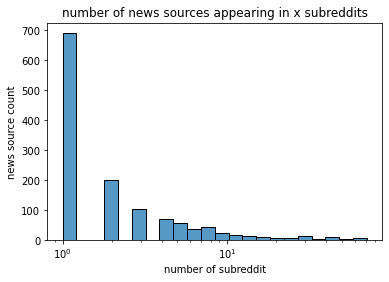

In [38]:
# sns.histplot([math.log(s,10) for s in scf])
sns.histplot(scf, log_scale=True)
plt.xlabel("number of subreddit")
plt.ylabel("news source count")
plt.title("number of news sources appearing in x subreddits")

How many news sources only appear in 10 subreddits or less? what about 9 or 8?

In [39]:
def pct_ns_in_k_subreddits(ks):
    ns_in_i_subreddit = [k for k in subreddit_count if subreddit_count[k] <= ks]
    count = len(ns_in_i_subreddit)
    print("There are {} news sources appearing in only {} subreddits or less ({}%)".format(count, ks, count/len(ns_union)))
    return count/len(ns_union)

In [40]:
pct_ns_in_k_subreddits(5)

There are 1122 news sources appearing in only 5 subreddits or less (0.8571428571428571%)


0.8571428571428571

In [41]:
0.15*len(ns_union)

196.35

In [42]:
pct_in_k_subreddits = [(i, pct_ns_in_k_subreddits(i)) for i in range(1000)]

There are 0 news sources appearing in only 0 subreddits or less (0.0%)
There are 690 news sources appearing in only 1 subreddits or less (0.5271199388846448%)
There are 891 news sources appearing in only 2 subreddits or less (0.680672268907563%)
There are 995 news sources appearing in only 3 subreddits or less (0.760122230710466%)
There are 1066 news sources appearing in only 4 subreddits or less (0.8143621084797555%)
There are 1122 news sources appearing in only 5 subreddits or less (0.8571428571428571%)
There are 1158 news sources appearing in only 6 subreddits or less (0.8846447669977082%)
There are 1184 news sources appearing in only 7 subreddits or less (0.904507257448434%)
There are 1202 news sources appearing in only 8 subreddits or less (0.9182582123758595%)
There are 1214 news sources appearing in only 9 subreddits or less (0.9274255156608098%)
There are 1224 news sources appearing in only 10 subreddits or less (0.935064935064935%)
There are 1234 news sources appearing in only

There are 1309 news sources appearing in only 304 subreddits or less (1.0%)
There are 1309 news sources appearing in only 305 subreddits or less (1.0%)
There are 1309 news sources appearing in only 306 subreddits or less (1.0%)
There are 1309 news sources appearing in only 307 subreddits or less (1.0%)
There are 1309 news sources appearing in only 308 subreddits or less (1.0%)
There are 1309 news sources appearing in only 309 subreddits or less (1.0%)
There are 1309 news sources appearing in only 310 subreddits or less (1.0%)
There are 1309 news sources appearing in only 311 subreddits or less (1.0%)
There are 1309 news sources appearing in only 312 subreddits or less (1.0%)
There are 1309 news sources appearing in only 313 subreddits or less (1.0%)
There are 1309 news sources appearing in only 314 subreddits or less (1.0%)
There are 1309 news sources appearing in only 315 subreddits or less (1.0%)
There are 1309 news sources appearing in only 316 subreddits or less (1.0%)
There are 13

There are 1309 news sources appearing in only 638 subreddits or less (1.0%)
There are 1309 news sources appearing in only 639 subreddits or less (1.0%)
There are 1309 news sources appearing in only 640 subreddits or less (1.0%)
There are 1309 news sources appearing in only 641 subreddits or less (1.0%)
There are 1309 news sources appearing in only 642 subreddits or less (1.0%)
There are 1309 news sources appearing in only 643 subreddits or less (1.0%)
There are 1309 news sources appearing in only 644 subreddits or less (1.0%)
There are 1309 news sources appearing in only 645 subreddits or less (1.0%)
There are 1309 news sources appearing in only 646 subreddits or less (1.0%)
There are 1309 news sources appearing in only 647 subreddits or less (1.0%)
There are 1309 news sources appearing in only 648 subreddits or less (1.0%)
There are 1309 news sources appearing in only 649 subreddits or less (1.0%)
There are 1309 news sources appearing in only 650 subreddits or less (1.0%)
There are 13

[(0.0, 80.0)]

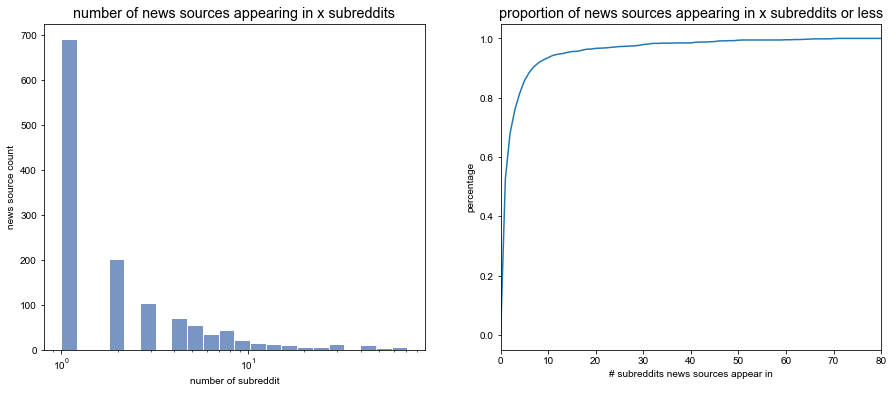

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.set(font_scale = 1.2)

sns.histplot(scf, log_scale=True, ax=ax1)
ax1.set_xlabel("number of subreddit")
ax1.set_ylabel("news source count")
ax1.set_title("number of news sources appearing in x subreddits")

sns.lineplot(x=[k[0] for k in pct_in_k_subreddits],
             y=[k[1] for k in pct_in_k_subreddits],
            ax=ax2)
ax2.set_ylabel("percentage")
ax2.set_xlabel("# subreddits news sources appear in")
ax2.set_title("proportion of news sources appearing in x subreddits or less")
ax2.set(xlim = (0, 80))

In [44]:
# mean
statistics.mean(scf)

3.8456837280366694

In [45]:
# median
statistics.median(scf)

1

## For each news source let's count how many times they are shared regardless of in which subreddits

In [46]:
sum(dict().values())

0

In [47]:
def get_mention_count(ns):
    """get total mention count of ns in all six months"""
    count = 0
    files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
    for f in files:
        ns_dict = f.get(ns, dict())
        if len(ns_dict) > 0:
            mentions = sum([m[0] for m in ns_dict.values()])
            count += mentions
    return count

In [48]:
mention_count = dict()
for ns in ns_union:
    mention_count[ns] = get_mention_count(ns)

In [49]:
statistics.mean(mention_count.values())

30.019862490450727

In [50]:
statistics.stdev(mention_count.values())

213.44600095535708

In [51]:
statistics.median(mention_count.values())

2

In [52]:
len(mention_count)

1309

In [53]:
Counter(mention_count).most_common(20)

[('nba.com', 5540),
 ('espn.com', 3913),
 ('nbcsports.com', 2011),
 ('usatoday.com', 1416),
 ('theathletic.com', 1240),
 ('si.com', 1195),
 ('bleacherreport.com', 1063),
 ('nfl.com', 927),
 ('cbssports.com', 789),
 ('theguardian.com', 509),
 ('pff.com', 503),
 ('manutd.com', 464),
 ('telegraph.co.uk', 405),
 ('skysports.com', 403),
 ('bbc.co.uk', 375),
 ('denverbroncos.com', 356),
 ('theringer.com', 340),
 ('arsenal.com', 336),
 ('goal.com', 334),
 ('football.london', 320)]

In [54]:
news_ge10k = [m for m in mention_count if mention_count[m] >= 1000]
len(news_ge10k)

7

<AxesSubplot:ylabel='Count'>

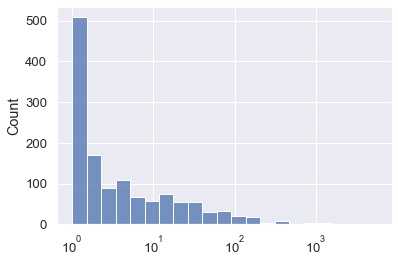

In [55]:
sns.histplot(list(mention_count.values()), log_scale=True)

<AxesSubplot:ylabel='Count'>

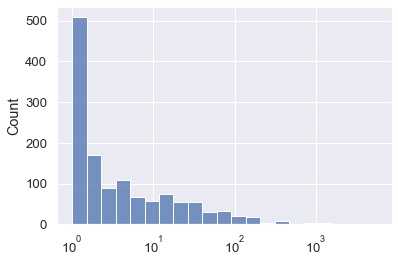

In [56]:
sns.histplot(list([k for k in mention_count.values() if k <100000]), log_scale=True)

In [57]:
len([k for k in mention_count.values() if k <5])*100/len(mention_count)

63.71275783040489

In [58]:
(1-0.35)*len(mention_count)

850.85

## For each subreddit let's count how many news sources were mentioned in it

Counting how many news sources were mentioned in each subreddit

In [59]:
nsc_count = dict()
for sr in sr_union:
    nsc_count[sr] = len(set(subreddit_ns_jan.get(sr, dict()).keys()) 
                               | set(subreddit_ns_feb.get(sr, dict()).keys()) 
                               | set(subreddit_ns_march.get(sr, dict()).keys()) 
                               | set(subreddit_ns_april.get(sr, dict()).keys())
                               | set(subreddit_ns_may.get(sr, dict()).keys()) 
                               | set(subreddit_ns_jun.get(sr, dict()).keys()))

`nsc_count` stores how many news sources appear in each subreddit.

In [60]:
len([k for k in nsc_count if nsc_count[k]<1])

0

In [61]:
nsc_count_freq = dict(Counter(nsc_count.values()).most_common())
nsc_count_freq

{53: 4,
 36: 3,
 43: 3,
 77: 3,
 66: 3,
 80: 3,
 56: 3,
 97: 2,
 39: 2,
 94: 2,
 49: 2,
 47: 2,
 38: 2,
 40: 2,
 88: 2,
 52: 2,
 42: 2,
 81: 2,
 7: 2,
 60: 2,
 96: 2,
 9: 1,
 5: 1,
 1: 1,
 35: 1,
 108: 1,
 83: 1,
 76: 1,
 48: 1,
 188: 1,
 71: 1,
 31: 1,
 22: 1,
 65: 1,
 11: 1,
 75: 1,
 63: 1,
 98: 1,
 61: 1,
 153: 1,
 140: 1,
 14: 1,
 136: 1,
 67: 1,
 226: 1,
 62: 1,
 82: 1,
 104: 1,
 54: 1}

`nsc_count_freq` keeps track of how many news sources appear in *n* subreddits for all possible *n*.

In [62]:
max(nsc_count_freq.keys())

226

In [63]:
nsc_ranked = Counter(nsc_count).most_common()

for t in nsc_ranked:
    sr, co = t
    if co >= 80:
        print(f"{sr} has {co} news sources mentioned in it.")

Gunners has 226 news sources mentioned in it.
reddevils has 188 news sources mentioned in it.
coys has 153 news sources mentioned in it.
LiverpoolFC has 140 news sources mentioned in it.
chelseafc has 136 news sources mentioned in it.
lakers has 108 news sources mentioned in it.
buccaneers has 104 news sources mentioned in it.
CHIBears has 98 news sources mentioned in it.
bostonceltics has 97 news sources mentioned in it.
Patriots has 97 news sources mentioned in it.
GreenBayPackers has 96 news sources mentioned in it.
detroitlions has 96 news sources mentioned in it.
buffalobills has 94 news sources mentioned in it.
torontoraptors has 94 news sources mentioned in it.
MCFC has 88 news sources mentioned in it.
DenverBroncos has 88 news sources mentioned in it.
nyjets has 83 news sources mentioned in it.
Seahawks has 82 news sources mentioned in it.
eagles has 81 news sources mentioned in it.
Browns has 81 news sources mentioned in it.
49ers has 80 news sources mentioned in it.
NYKnicks 

In [64]:
sum(nsc_count_freq.values()) == len(sr_union)

True

In [65]:
import itertools

In [66]:
nsc = list(itertools.chain.from_iterable(itertools.repeat(k,v) for k,v in nsc_count_freq.items()))

Text(0.5, 1.0, 'number of subreddits with x news sources')

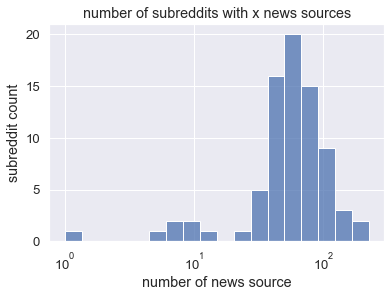

In [67]:
sns.histplot(nsc, log_scale=True)
plt.xlabel("number of news source")
plt.ylabel("subreddit count")
plt.title("number of subreddits with x news sources")

In [68]:
len([n for n in nsc if n>=20])

71

How many subreddits only mentioned 5 news sources or less?

In [69]:
def pct_subreddits_mentioning_k_newssources(ks):
    sr_mention_i_nsc = [k for k in nsc_count if nsc_count[k] <= ks]
    count = len(sr_mention_i_nsc)
    print("There are {} subreddits mentioning in only {} news sources or less ({}%)".format(count, ks, count/len(sr_union)))
    return count/len(sr_union)

In [70]:
pct_subreddits_mentioning_k_newssources(20)

There are 7 subreddits mentioning in only 20 news sources or less (0.08974358974358974%)


0.08974358974358974

In [71]:
# mean
statistics.mean(nsc)

64.53846153846153

In [72]:
# median
statistics.median(nsc)

58.0

## For each subreddit let's count total submissions that are news source related

In [73]:
def get_submission_count(sb):
    """get total mention count of ns in all six months"""
    count = 0
    files = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
    for f in files:
        sb_dict = f.get(sb, dict())
        if len(sb_dict) > 0:
            mentions = sum([m[0] for m in sb_dict.values()])
            count += mentions
    return count

In [74]:
mention_count = dict()
for sb in sr_union:
    mention_count[sb] = get_submission_count(sb)

In [75]:
statistics.mean(mention_count.values())

503.79487179487177

In [76]:
statistics.stdev(mention_count.values())

405.09381177326856

In [77]:
statistics.median(mention_count.values())

400.5

In [78]:
len(mention_count)

78

In [79]:
Counter(mention_count).most_common(20)

[('reddevils', 1991),
 ('Gunners', 1974),
 ('MkeBucks', 1331),
 ('NYKnicks', 1290),
 ('warriors', 1279),
 ('DenverBroncos', 1271),
 ('chelseafc', 1127),
 ('torontoraptors', 1074),
 ('denvernuggets', 1033),
 ('coys', 1007),
 ('Patriots', 840),
 ('49ers', 827),
 ('LiverpoolFC', 810),
 ('detroitlions', 766),
 ('CHIBears', 724),
 ('eagles', 704),
 ('GreenBayPackers', 698),
 ('Seahawks', 692),
 ('bostonceltics', 679),
 ('suns', 663)]

In [80]:
ns_subreddit_01['cbc.ca']

{'steelers': [1, 1.0, 1]}

<AxesSubplot:ylabel='Count'>

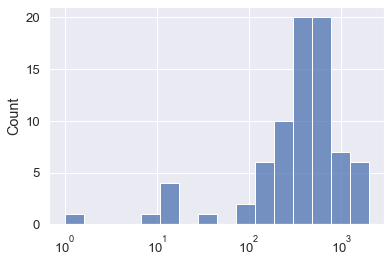

In [81]:
sns.histplot(list(mention_count.values()), log_scale=True)

In [82]:
len([k for k in mention_count.values() if k <5])*100/len(mention_count)

1.2820512820512822

In [83]:
(1-0.35)*len(mention_count)

50.7

## upvote based weight vs comment based weight 

Do they have correlation?

Let's look at January's data

In [84]:
upvote_based = [ns_subreddit_01[ns][sr][1] for ns in ns_subreddit_01 for sr in ns_subreddit_01[ns]]
comment_based = [ns_subreddit_01[ns][sr][2] for ns in ns_subreddit_01 for sr in ns_subreddit_01[ns]]
unweighted = [ns_subreddit_01[ns][sr][0] for ns in ns_subreddit_01 for sr in ns_subreddit_01[ns]]

Text(0, 0.5, 'upvote_based')

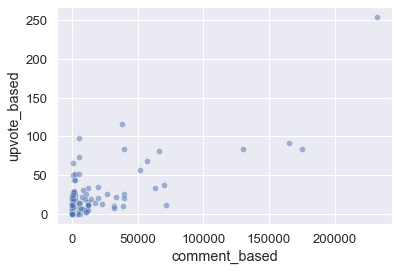

In [85]:
sns.scatterplot(x=comment_based, y=upvote_based, alpha=0.5)
plt.xlabel("comment_based")
plt.ylabel("upvote_based")
# plt.xlim([-100000,4000000])
# plt.ylim([-5000,150000])

Text(0, 0.5, 'upvote_based')

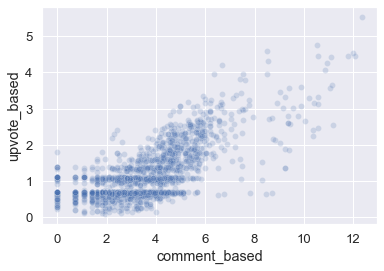

In [86]:
a = sns.scatterplot(x=np.log(np.array([c+1 for c in comment_based])), y=np.log(np.array([u+1 for u in upvote_based])), alpha=0.2)
plt.xlabel("comment_based")
plt.ylabel("upvote_based")

In [87]:
from scipy.stats import pearsonr

In [88]:
corr, _ = pearsonr(np.log(np.array([c+1 for c in comment_based])), np.log(np.array([u+1 for u in upvote_based])))
corr

0.7232715080561875

In [89]:
corr_raw, _ = pearsonr(comment_based, upvote_based)
corr_raw

0.7516748601944009

In [90]:
non_outlier = [n for n in ns_union if subreddit_count[n]>10]
len(non_outlier)

85

In [91]:
# with open("sport_news_non_outlier.json", "w", encoding="utf-8") as s:
#     json.dump(non_outlier, s)

## Cluster Try Out

First, I make a list of subreddits with fixed order, where I only include subreddits where our non_outlier news sources are mentioned in.

In [92]:
len(non_outlier)

85

In [93]:
# subreddits = subs
subreddits = set()
nsr_files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
# first, I filter for only the subreddits in which our news sources are mentioned
c = 0
for n in non_outlier:
    subreddits = (subreddits | (set(ns_subreddit_01.get(n, dict()).keys()) 
                               & set(ns_subreddit_02.get(n, dict()).keys()) 
                               & set(ns_subreddit_03.get(n, dict()).keys()) 
                               & set(ns_subreddit_04.get(n, dict()).keys())
                               & set(ns_subreddit_05.get(n, dict()).keys()) 
                               & set(ns_subreddit_06.get(n, dict()).keys())))
    c += 1
    if c%100==0: print(f"done {c}")
subreddits = list(subreddits)
len(subreddits)

67

There are 9195 subreddits.

In [94]:
subreddits[-10:]

['timberwolves',
 'panthers',
 'pacers',
 'Everton',
 'CharlotteHornets',
 'detroitlions',
 'DetroitPistons',
 'MkeBucks',
 'UtahJazz',
 'LosAngelesRams']

If I should order them later, I can do so.

## Incorporating subscribers information

In [95]:
pd1 = os.path.split(os.getcwd())[0]
data_fp = os.path.join(pd1,"data/gm-newssources-subreddits")
dfp = os.path.join(pd1,"data")

In [96]:
sfp = os.path.join(pd1,"data/subreddits")

In [97]:
# Let's only use the subreddits that have lots of subscribers
with open (os.path.join(sfp,"subreddit_subscribers.json"), "r", encoding = "utf-8") as infile:
    subreddit_subscribers = json.load(infile)

In [98]:
subreddit_subscribers['politics']

6201779

In [99]:
len(subreddit_subscribers)

49055

In [100]:
len(subreddits)

67

In [101]:
subreddits_w_subc = [k for k in subreddits if k in subreddit_subscribers]
len(subreddits_w_subc)

67

It seems that there are `None` values, so let's filter those subreddits out.

In [102]:
print([s for s in subreddits_w_subc if subreddit_subscribers[s] is None])

[]


In [103]:
subreddits_w_subc = [s for s in subreddits_w_subc if subreddit_subscribers[s] is not None]

In [104]:
len(subreddits_w_subc)

67

Now, I will sort the 8,294 subreddits based on the # of their subscribers in a descending order.

In [105]:
srs_all = sorted(subreddits_w_subc, key= lambda x: subreddit_subscribers[x], reverse= True)

Text(0.5, 1.0, 'Subreddits Subscribers')

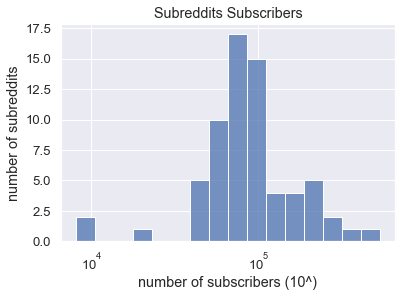

In [106]:
# plt.hist([math.log(subreddit_subscribers[s],10) for s in srs_all if subreddit_subscribers[s] > 0])
sns.histplot([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s]>0], log_scale=True)
# plt.hist([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s] > 0])
# plt.yscale("log")
# plt.xscale("log")
plt.ylabel("number of subreddits")
plt.xlabel("number of subscribers (10^)")
plt.title("Subreddits Subscribers")
# log scale for both x and y

Which subreddits are the top three?

In [107]:
print([(s,subreddit_subscribers[s]) for s in srs_all if subreddit_subscribers[s]>10000])

[('Patriots', 535250), ('LosAngelesRams', 387495), ('warriors', 265568), ('LiverpoolFC', 250977), ('reddevils', 240096), ('lakers', 239106), ('torontoraptors', 229126), ('bostonceltics', 207371), ('eagles', 199979), ('chelseafc', 176842), ('Gunners', 162044), ('GreenBayPackers', 157249), ('sixers', 149868), ('cowboys', 133201), ('rockets', 128870), ('chicagobulls', 126536), ('steelers', 115849), ('49ers', 110980), ('NYKnicks', 110101), ('minnesotavikings', 107310), ('Seahawks', 104920), ('MkeBucks', 102969), ('GoNets', 102496), ('Mavericks', 101968), ('CHIBears', 99668), ('Thunder', 96946), ('AtlantaHawks', 96345), ('falcons', 95529), ('KansasCityChiefs', 93204), ('ravens', 90432), ('NBASpurs', 90311), ('timberwolves', 85685), ('Browns', 84275), ('denvernuggets', 82369), ('washingtonwizards', 80246), ('suns', 79819), ('UtahJazz', 79381), ('DenverBroncos', 78960), ('LAClippers', 78619), ('kings', 78406), ('detroitlions', 78160), ('NYGiants', 75984), ('pacers', 71666), ('DetroitPistons',

In [108]:
list(subreddit_subscribers.values()).count(None)

25

In [109]:
statistics.median([k for k in list(subreddit_subscribers.values()) if k is not None])

1420.0

In [110]:
statistics.mean([k for k in list(subreddit_subscribers.values()) if k is not None])

50070.832184376915

## Building `ns_repr`

Which will be in the form of feature-based matrix, where each row represents a news source, and columns representing subreddits. 

Idea 1: Each subreddit will be represented by 18 columns: unweighted count, upvote based weighted count, and comment based weighted count for each of the six months that we are interested in. THIS does not work.

Idea 2: Each subreddit will be represented by 3 columns: average unweighted count, average upvote based weighted count, and average comment based weighted count.

In [111]:
srs = srs_all

In [112]:
a = {"a": 1, "b": 2}
b = {"b": 1, "c": 2}
res = {**a, **b}
res

{'a': 1, 'b': 1, 'c': 2}

Idea 1: For each news source, I create a list of length `(18 * # subreddits)`.

Idea 1: For each news source, I create a list of length `(3 * # subreddits)`

Old code
```
# here I will cast the inner dictionaries of ns_subreddits to be Counter so I can avoid a lot of if-else statements
files = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]
for f in files:
    for k in f: # k is each news source
        for ns in f[k]:
            # averaging based on weighted counts
            count, upv, comm = f[k][ns]
            avg = (upv + comm)/count
            f[k][ns] = avg
        f[k] = Counter(f[k])
```

In [113]:
files_sub = [subreddit_ns_jan, subreddit_ns_feb, subreddit_ns_march, subreddit_ns_april, subreddit_ns_may, subreddit_ns_jun]
files_ns = [ns_subreddit_01, ns_subreddit_02, ns_subreddit_03, ns_subreddit_04, ns_subreddit_05, ns_subreddit_06]

In [114]:
len(non_outlier)

85

In [115]:
len(srs)

67

I tried and found out that using all 23.7k subreddits results in MemoryError. So I should use less

In [116]:
srs = srs_all

For idea 1:

```
ns_sr_rep = defaultdict(list)
default_counter = Counter() # to avoid a lot of if else statements

ncount = 0

# for ns in nss:
for ns in non_outlier:
    # for each news sources, construct the 18*length(subreddits) features
    for f in files_sub:
        for idx in range(len(srs)):
            # making sure the ordering follows `srs` based on subscribers
            ns_sr_rep[ns] += f[ns][srs[idx]][1:] if (ns in f and srs[idx] in f[ns]) else [0, 0]
    ncount += 1
    if ncount%200==0: print(ncount)
```

In [117]:
# For idea 2

ns_sr_rep = defaultdict(list)
default_counter = Counter() # to avoid a lot of if else statements

ncount = 0

# for ns in nss:
for ns in non_outlier:
    # for each news sources, construct the length(subreddits) features
    for idx in range(len(srs)):
        # making sure the ordering follows `srs` based on subscribers
        current_sr = srs[idx]
        # avg_unweighted_counts = sum([ii[current_sr][ns][0] if current_sr in ii and ns in ii[current_sr] else 0 for ii in files_sub])/6
        avg_votebased_counts = sum([ii[current_sr][ns][1] if (current_sr in ii and ns in ii[current_sr]) else 0 for ii in files_sub])/6
        avg_commentbased_counts = sum([ii[current_sr][ns][2] if current_sr in ii and ns in ii[current_sr] else 0 for ii in files_sub])/6
        ns_sr_rep[ns] += [avg_votebased_counts, avg_commentbased_counts]
    ncount += 1
    if ncount%200==0: print(ncount)

In [118]:
len(srs)

67

In [119]:
len(non_outlier)

85

    code started at 22:56

Let's see one example of representation for `nytimes.com`.

In [120]:
ns_sr_rep["bbc.co.uk"]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.2200000000000015,
 128.0,
 14.876666666666667,
 668.3333333333334,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.345,
 549.1666666666666,
 7.181666666666668,
 324.1666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.161666666666667,
 153.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0850000000000004,
 46.666666666666664,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.2783333333333333,
 116.66666666666667,
 5.666666666666667,
 160.0,
 2.626666666666667,
 10.6

Let's investigate the sparsity of our data

In [121]:
from numpy import array
from numpy import count_nonzero
from scipy.sparse import csr_matrix

In [122]:
# ns_repr, ns_fixed = np.array([v[1] for v in items]), list([v[0] for v in items]) # this causes memory error
## MemoryError: Unable to allocate 15.3 GiB for an array with shape (11436, 180000) and data type float64
items = ns_sr_rep.items()
ns_repr = np.array([k for k in ns_sr_rep.values()])

In [123]:
ns_repr[:10]

array([[4.68333333e-01, 2.56666667e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.75333333e+00, 1.21666667e+02, 1.10333333e+00, ...,
        1.15000000e+01, 9.67333333e+00, 3.88333333e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.60000000e+00, 1.89500000e+02, 1.60000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79666667e+00, 7.85000000e+01, 2.71333333e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [124]:
sparsity = 1.0 - np.count_nonzero(ns_repr)/ns_repr.size

In [125]:
sparsity

0.6286215978928885

Wow very high sparsity.

In [126]:
len(non_outlier)

85

How many subreddits have all 0's for all news sources?

In [127]:
counter = 0
for ii in range(len(srs)):
    fl = []
    for kk in ns_repr:
        fl.append(kk[ii])
    counter += 1
    print(statistics.median(fl), statistics.mean(fl), statistics.variance(fl), counter)

0.13 0.9714705882352941 5.967525159508248 1
0.16666666666666666 37.537254901960786 9644.130539993776 2
0.0 0.3150588235294118 1.1393875295673825 3
0.0 5.9980392156862745 384.8204326174914 4
0.0 2.0736470588235294 98.33422582633051 5
0.0 1673.5960784313725 156101061.34350294 6
0.0 0.827 4.538353756613756 7
0.0 72.48039215686275 48797.777388733266 8
0.0 1.9070980392156862 25.915844388422038 9
0.0 273.5352941176471 3026604.9048241517 10
0.13999999999999999 0.8344313725490196 6.602561941332087 11
0.6666666666666666 41.24901960784314 66270.78744942423 12
0.0 1.43421568627451 31.876324377528785 13
0.0 920.2607843137255 27419206.11868192 14
0.12333333333333334 0.8247254901960784 8.188370161842514 15
1.0 85.63921568627451 320857.0448723934 16
0.0 0.7860784313725491 4.1264737239340175 17
0.0 45.62549019607843 15002.636842514785 18
0.0 0.8845098039215686 5.453585967164643 19
0.0 99.9843137254902 197392.76297852473 20
0.0 1.1114117647058823 9.178895536103331 21
0.0 65.36470588235294 40573.1107765

In [128]:
# convert to sparse matrix (CSR method)
S = csr_matrix(ns_repr)
print(S)

  (0, 0)	0.4683333333333333
  (0, 1)	25.666666666666668
  (0, 4)	0.6283333333333334
  (0, 5)	25.5
  (0, 6)	0.25
  (0, 7)	7.333333333333333
  (0, 8)	6.111666666666667
  (0, 9)	293.8333333333333
  (0, 10)	0.13999999999999999
  (0, 11)	0.8333333333333334
  (0, 12)	0.49833333333333335
  (0, 13)	6.166666666666667
  (0, 14)	0.225
  (0, 15)	2.3333333333333335
  (0, 16)	0.26166666666666666
  (0, 17)	12.833333333333334
  (0, 18)	3.1316666666666664
  (0, 19)	56.666666666666664
  (0, 20)	0.47833333333333333
  (0, 21)	12.166666666666666
  (0, 22)	0.16666666666666666
  (0, 23)	0.3333333333333333
  (0, 24)	0.36166666666666664
  (0, 25)	6.5
  (0, 26)	0.14333333333333334
  :	:
  (83, 124)	2.14
  (83, 125)	33.833333333333336
  (83, 126)	3.266666666666666
  (83, 127)	63.666666666666664
  (84, 10)	0.125
  (84, 11)	1.8333333333333333
  (84, 12)	0.165
  (84, 13)	1.1666666666666667
  (84, 14)	0.26499999999999996
  (84, 15)	3.3333333333333335
  (84, 16)	0.3033333333333333
  (84, 17)	11.333333333333334
  (84,

### Now PCA

In [129]:
print([k for k in ns_repr[21:50]])

[array([4.25000000e-01, 2.66666667e+01, 0.00000000e+00, 0.00000000e+00,
       6.35000000e-01, 1.66666667e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.38333333e-01, 3.00000000e+00,
       1.61666667e-01, 0.00000000e+00, 1.48333333e-01, 1.00000000e+00,
       6.81666667e-01, 3.26666667e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.65000000e-01, 3.80000000e+01,
       1.63333333e-01, 2.66666667e+00, 1.00833333e+00, 5.43333333e+01,
       1.66666667e-01, 0.00000000e+00, 3.28333333e-01, 8.33333333e-01,
       9.56666667e-01, 2.55000000e+01, 4.16666667e-02, 5.00000000e-01,
       4.73333333e-01, 1.50000000e+00, 4.31666667e-01, 1.85000000e+01,
       2.00000000e-01, 3.83333333e+00, 0.00000000e+00, 0.00000000e+00,
       4.45000000e-01, 3.00000000e+00, 3.30000000e-01, 1.33333333e+00,
       4.20000000e-01, 3.00000000e+01, 3.08333333e-01, 1.33333333e+00,
       4.01666667e-01, 3.83333333e+00, 2.43333333e-01, 5.33333333e+00,
     

In [130]:
svd = TruncatedSVD(n_components=100) #, n_iter=7, random_state=42)
svd_pca = PCA(n_components=min(len(ns_repr), len(ns_repr[0])))

In [131]:
# fit1 = svd.fit(ns_repr)
# fit1 = svd.fit(csr_matrix(preprocessing.normalize(ns_repr)))
fit1 = svd_pca.fit(StandardScaler().fit_transform(np.array(ns_repr)))

In [132]:
explained_var = fit1.explained_variance_ratio_

In [133]:
explained_var

array([3.89721829e-01, 2.67886255e-01, 9.79684309e-02, 6.74168962e-02,
       3.69645043e-02, 2.53915325e-02, 1.81541784e-02, 1.35958109e-02,
       1.21418816e-02, 8.25265826e-03, 6.85127086e-03, 6.54983472e-03,
       5.13933876e-03, 4.80535814e-03, 4.53876158e-03, 4.09096776e-03,
       3.51288302e-03, 3.47486011e-03, 3.06177898e-03, 2.39178057e-03,
       2.22843108e-03, 1.91324707e-03, 1.63036712e-03, 1.48790735e-03,
       1.35332923e-03, 1.15401919e-03, 9.85065289e-04, 9.09980118e-04,
       7.49193201e-04, 6.75758774e-04, 6.28960333e-04, 5.39223603e-04,
       3.93709631e-04, 3.52165050e-04, 3.09621986e-04, 2.92775040e-04,
       2.56087517e-04, 2.24350123e-04, 2.10510942e-04, 1.81807460e-04,
       1.60216082e-04, 1.47541645e-04, 1.25862115e-04, 1.13585184e-04,
       1.09977806e-04, 9.96387935e-05, 9.43811854e-05, 7.55447027e-05,
       7.00399120e-05, 6.57888847e-05, 6.19837187e-05, 5.35866747e-05,
       4.99913188e-05, 4.43550807e-05, 3.87112902e-05, 3.46129443e-05,
      

In [134]:
len(explained_var)

85

In [135]:
fit1.explained_variance_ratio_.sum()

1.0

In [136]:
explained_var_sums = [sum(explained_var[:d]) for d in range(len(ns_repr))]

In [137]:
explained_var_sums

[0,
 0.38972182886367734,
 0.6576080840975793,
 0.7555765150175561,
 0.8229934112097196,
 0.8599579155314234,
 0.8853494480385171,
 0.903503626431409,
 0.9170994373345738,
 0.9292413189378564,
 0.9374939771950982,
 0.9443452480551059,
 0.9508950827743159,
 0.9560344215334864,
 0.9608397796783781,
 0.9653785412551494,
 0.9694695090158729,
 0.9729823920312518,
 0.9764572521453552,
 0.9795190311212859,
 0.9819108116949766,
 0.9841392427775989,
 0.9860524898454136,
 0.9876828569607257,
 0.9891707643079989,
 0.990524093540281,
 0.9916781127277183,
 0.9926631780169529,
 0.9935731581348929,
 0.9943223513361757,
 0.994998110110412,
 0.9956270704436766,
 0.9961662940463437,
 0.9965600036776783,
 0.9969121687278526,
 0.9972217907143434,
 0.9975145657540592,
 0.997770653271419,
 0.9979950033941797,
 0.998205514336124,
 0.9983873217963071,
 0.9985475378787954,
 0.998695079523576,
 0.9988209416387853,
 0.9989345268232316,
 0.9990445046291497,
 0.99914414342269,
 0.9992385246080726,
 0.9993140693108

<AxesSubplot:>

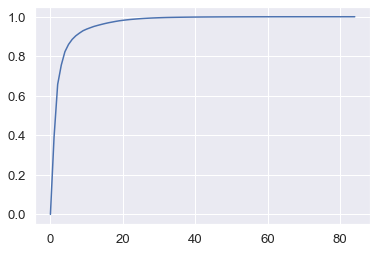

In [138]:
sns.lineplot(x=range(len(explained_var_sums)), y=explained_var_sums)

Now, I will cast those list representation values to be numpy arrays so I can preprocess them easily. Further, I will normalize each array.

*side note: `preprocessing.normalize` vs `standardscaler`*

In [139]:
preprocessing.normalize(np.array([[1,100,2,3],[2,50,100,10]]))

array([[0.00999301, 0.99930073, 0.01998601, 0.02997902],
       [0.01781459, 0.44536472, 0.89072943, 0.08907294]])

In [140]:
scaler = StandardScaler()
scaler.fit_transform(np.array([[1,100,2,3],[2,50,100,10],[2,50,100,10]]))

array([[-1.41421356,  1.41421356, -1.41421356, -1.41421356],
       [ 0.70710678, -0.70710678,  0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678,  0.70710678,  0.70710678]])

Now I'm thinking, should I *normalize* or *standardize*?

In [141]:
# for ns in ns_sr_rep:
#     rep = ns_sr_rep[ns]
#     ns_sr_rep[ns] = preprocessing.normalize(np.array([rep]))

## K-Means

Without and with standardization.

First, I need to find optimum `k`.

In [142]:
ns_repr_new = fit1.transform(StandardScaler().fit_transform(np.array(ns_repr))) #fit1 is PCA

In [143]:
old_ns_repr_new = ns_repr_new

In [144]:
ns_repr_new = [k[:7] for k in ns_repr_new]

In [145]:
kmeans = KMeans(init = "k-means++",
               n_clusters = 5,
               n_init = 10,
               max_iter = 100)

Freezing the list for representations and the news sources.

In [146]:
kmeans.fit([v for v in ns_repr_new])

KMeans(max_iter=100, n_clusters=5)

In [147]:
ns_fixed = list(ns_sr_rep.keys())

In [148]:
for i,ns in enumerate(ns_fixed):
    if (ns_sr_rep[ns] == ns_repr[i]).all():
        pass
    else:
        print("False")
print("True")

True


In [149]:
kmeans.inertia_

1679.8712156964405

In [150]:
kmeans.n_iter_

2

In [151]:
Counter(kmeans.labels_)

Counter({0: 68, 4: 9, 1: 6, 2: 1, 3: 1})

**Choosing the appropriate number of clusters**

1. Elbow method

In [246]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 360
}

In [247]:
sse = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(preprocessing.normalize(np.array(ns_repr_new)))
    sse.append(kmeans.inertia_)
    print(f"have done {k} rounds, current sse is {sse}")

have done 1 rounds, current sse is [52.59393554561735]
have done 2 rounds, current sse is [52.59393554561735, 28.147032110618557]
have done 3 rounds, current sse is [52.59393554561735, 28.147032110618557, 17.025253062813654]
have done 4 rounds, current sse is [52.59393554561735, 28.147032110618557, 17.025253062813654, 14.331209420475236]
have done 5 rounds, current sse is [52.59393554561735, 28.147032110618557, 17.025253062813654, 14.331209420475236, 12.424300352720895]
have done 6 rounds, current sse is [52.59393554561735, 28.147032110618557, 17.025253062813654, 14.331209420475236, 12.424300352720895, 10.496356101053799]
have done 7 rounds, current sse is [52.59393554561735, 28.147032110618557, 17.025253062813654, 14.331209420475236, 12.424300352720895, 10.496356101053799, 9.093742253458005]
have done 8 rounds, current sse is [52.59393554561735, 28.147032110618557, 17.025253062813654, 14.331209420475236, 12.424300352720895, 10.496356101053799, 9.093742253458005, 7.835762929099423]
hav

In [259]:
?plt.legend

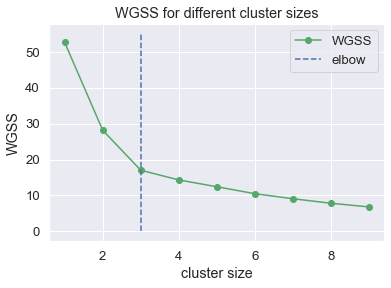

In [262]:
plt.plot(range(1,10),sse,"go-")
plt.title("WGSS for different cluster sizes")
plt.xlabel("cluster size")
plt.ylabel("WGSS")
plt.plot([3,3], [0,55], "--")
plt.legend(["WGSS","elbow"])

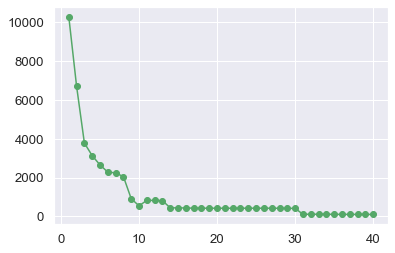

In [156]:
plt.plot(range(1,41),sse,"go-")

In [249]:
kl = KneeLocator(range(1,10), sse, curve="convex", direction="decreasing")

In [250]:
kl.elbow

3

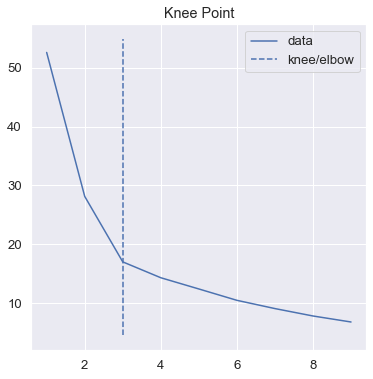

In [253]:
kl.plot_knee()

**Using Silhouette Coefficient**

In [159]:
sc = []
new_sse = []
for k in range(2,30):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(ns_repr_new)
    score = silhouette_score(ns_repr_new, kmeans.labels_)
    sc.append(score)
    new_sse.append(kmeans.inertia_)
    print("step {}".format(k))

step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29


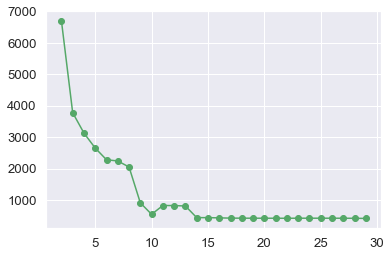

In [160]:
# for sse
plt.plot(range(2,30), new_sse, "go-")

In [161]:
kl_new = KneeLocator(range(2,30), new_sse, curve="convex", direction="decreasing")
kl_new.elbow

6

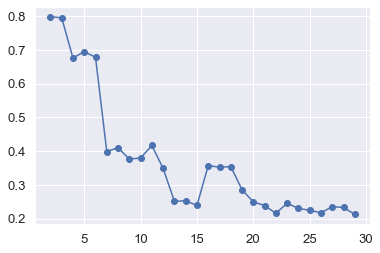

In [162]:
# for silhouette coefficient
plt.plot(range(2,30), sc, "bo-")

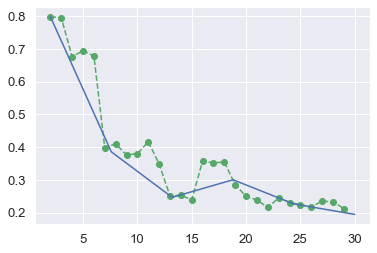

In [163]:


spl = make_interp_spline(range(2,30), sc, k=3)  # type: BSpline

xs = np.linspace(2, 30, 6)
ys = spl(xs)

plt.plot(range(2,30), sc, "go--")
plt.plot(xs, ys, "b-")

Let's choose k = 10

In [295]:
kmeans = KMeans(n_clusters = 3, init="k-means++", n_init = 50, max_iter = 500, random_state = 360)
kmeans.fit(preprocessing.normalize(np.array(ns_repr_new)))
# kmeans.fit(StandardScaler().fit_transform(np.array(ns_repr_new)))

KMeans(max_iter=500, n_clusters=3, n_init=50, random_state=360)

In [296]:
kmeans.labels_

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2])

In [297]:
set(kmeans.labels_)

{0, 1, 2}

In [298]:
Counter(kmeans.labels_)

Counter({2: 63, 1: 11, 0: 11})

**Let's investigate each cluster**

In [299]:
len(ns_sr_rep)

85

In [312]:
len(kmeans.labels_)

85

In [313]:
clustered = defaultdict(list)
for idx,ns in enumerate(non_outlier):
    c = kmeans.labels_[idx]
    clustered[c].append(ns)

In [314]:
print([len(clustered[i]) for i in range(5)])

[11, 11, 63, 0, 0]


Let's see in terms of percentage

In [304]:
cluster_lens = [len(clustered[i]) for i in range(10)]

In [305]:
print([round(k*100/sum(cluster_lens),2) for k in cluster_lens])

[12.94, 12.94, 74.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


 **could do iterative clusters for ^**

In [306]:
clustered[1]

['theathletic.com',
 'bbc.co.uk',
 'skysports.com',
 'independent.co.uk',
 'mirror.co.uk',
 'telegraph.co.uk',
 'theguardian.com',
 'thetimes.co.uk',
 'premierleague.com',
 'dailymail.co.uk',
 'bbc.com']

In [307]:
# sports_cluster = dict()
# for ii in range(3):
#     for n in clustered[ii]:
#         sports_cluster[n] = ii
# json.dump(sports_cluster, open("sports_cluster.json", "w", encoding="utf-8"))

# Agglomerative (Hierarchical) Clustering

In [271]:
hclustering = AgglomerativeClustering(n_clusters=3)

In [272]:
hclustering.fit(preprocessing.normalize(np.array(ns_repr_new)))

AgglomerativeClustering(n_clusters=3)

In [273]:
hclustering.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [274]:
hier_clustered = defaultdict(list)
for idx,ns in enumerate(non_outlier):
    c = hclustering.labels_[idx]
    hier_clustered[c].append(ns)

In [275]:
print([len(hier_clustered[i]) for i in range(5)])

[66, 10, 9, 0, 0]


Let's see in terms of percentage

In [279]:
hcluster_lens = [len(hier_clustered[i]) for i in range(3)]

In [280]:
print([round(k*100/sum(hcluster_lens),2) for k in hcluster_lens])

[77.65, 11.76, 10.59]


In [281]:
hier_clustered[1]

['nfl.com',
 'pff.com',
 'nbcsports.com',
 'usatoday.com',
 'bleacherreport.com',
 'espn.com',
 'cbssports.com',
 'thedraftnetwork.com',
 'profootballnetwork.com',
 'si.com']

## Using scipy

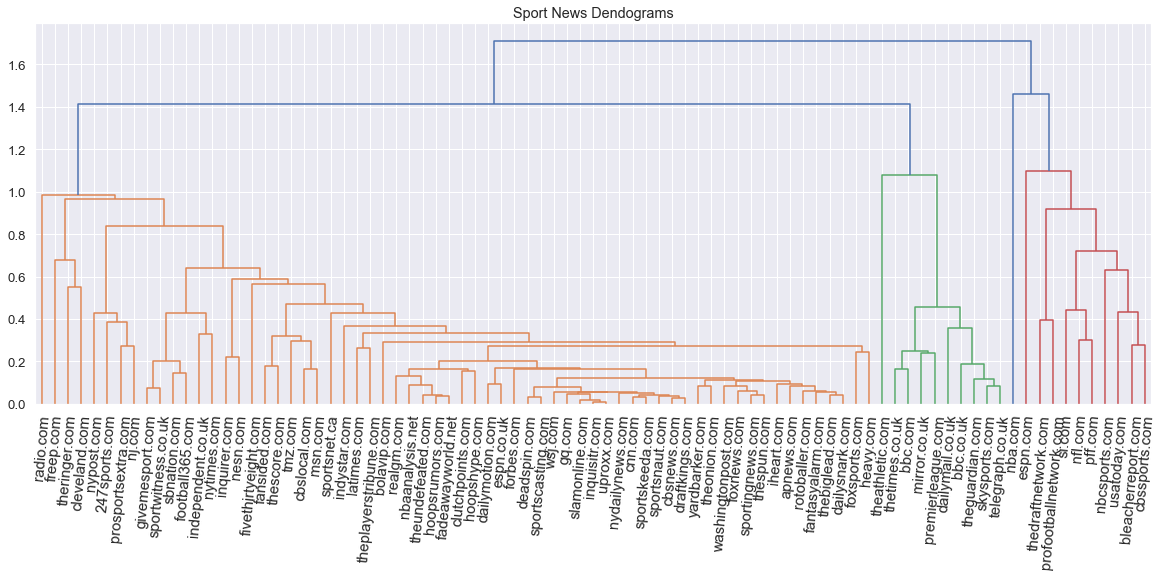

In [199]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 7))
plt.title("Sport News Dendograms")
dend = shc.dendrogram(shc.linkage(preprocessing.normalize(np.array(ns_repr_new)), method='average'),
# dend = shc.dendrogram(shc.linkage(StandardScaler().fit_transform(np.array(ns_repr_new)), method='weighted'),
                     labels = list(ns_sr_rep.keys()),
                     leaf_font_size = 15,
                     leaf_rotation = 85)

In [185]:
"foxnews.com" in ns_union

True

## Visualizing 2D PCA

With t-SNE

In [263]:
from sklearn.manifold import TSNE
from datetime import datetime

tsne = TSNE(n_components = 3, perplexity=50)

In [264]:
print(datetime.now())
threed = tsne.fit_transform(preprocessing.normalize(np.array(ns_repr_new)))
print(datetime.now())

2022-04-15 17:23:07.863674
2022-04-15 17:23:08.362287


In [269]:
xs = [k[0] for k in preprocessing.normalize(np.array(ns_repr_new))]
ys = [k[1] for k in preprocessing.normalize(np.array(ns_repr_new))]
zs = [k[2] for k in preprocessing.normalize(np.array(ns_repr_new))]

In [270]:
df = pandas.DataFrame({"pc1": xs,
                   "pc2": ys,
                   "pc3": zs,
                   # "pc4": bs[:100],
                   "source": ns_fixed})

fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3', 
                    # color='pc4', 
                    hover_name='source', opacity=0.4)
fig.show()

In [308]:
from sklearn import metrics

In [325]:
metrics.silhouette_score(preprocessing.normalize(np.array(ns_repr_new)), kmeans.labels_, metric='euclidean')

0.606010016662346

In [322]:
ss = metrics.silhouette_samples(preprocessing.normalize(np.array(ns_repr_new)), kmeans.labels_, metric='euclidean')

<AxesSubplot:ylabel='Count'>

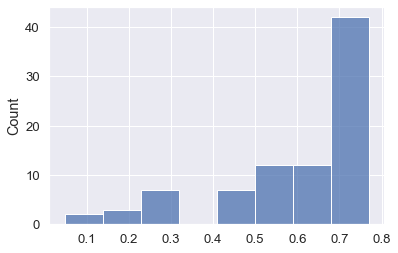

In [326]:
sns.histplot(ss)

In [327]:
label2ss = defaultdict(list)
for ii in range(len(non_outlier)):
    label2ss[kmeans.labels_[ii]].append(ss[ii])

In [368]:
len(label2ss)

3

In [332]:
label2ss[1]

[0.18324381751939814,
 0.7062743129086089,
 0.7148055089004112,
 0.07162068112047956,
 0.5876064683515858,
 0.7168810607947794,
 0.7051341523136944,
 0.6226584991322095,
 0.7020452702212212,
 0.6127372585634278,
 0.5861178272938184]

Text(0, 0.5, 'sillouette coefficient value')

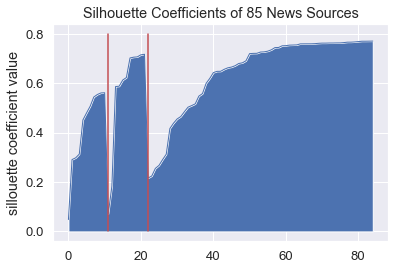

In [366]:
plt.plot(range(len(ns_fixed)), sorted(label2ss[0])+sorted(label2ss[1])+sorted(label2ss[2]), '-', linewidth=1, fillstyle='bottom')
plt.plot([11,11], [0,0.8], 'r')
plt.plot([22,22], [0,0.8], 'r')
plt.fill_between(range(len(ns_fixed)), sorted(label2ss[0])+sorted(label2ss[1])+sorted(label2ss[2]), 0)
plt.title("Silhouette Coefficients of 85 News Sources")
plt.ylabel("sillouette coefficient value")

In [310]:
# higher better
metrics.calinski_harabasz_score(ns_repr_new, kmeans.labels_)

21.602216608187508

In [311]:
# closer to 0 better
metrics.davies_bouldin_score(ns_repr_new, kmeans.labels_)

1.2416648154910845

In [321]:
len(non_outlier)

85